# **Prediksi Harga  -  Simple Linear Regression**

## 1. Data Preparation

### 1.1 Import Library

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Baca Dataset

In [48]:
df = pd.read_excel('Datains - Marcella - Price Monitoring TP-Link_TP-Link Price Monitoring_Table (1).xlsx')

In [42]:
print('\nInfromasi Statistik')
df.describe()


Infromasi Statistik


,Last Crawling,SKU Name,Bottom Price,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
count,32752,32752.0,32752.0,3.275200e+04,32752.000000,32752.000000,3.275200e+04
mean,2022-09-25 19:55:32.681973504,1.0,155000.0,2.682895e+05,0.017168,13.314729,2.083309e+06
min,2022-09-20 00:00:00,1.0,155000.0,2.500000e+04,0.000000,0.000000,0.000000e+00
25%,2022-09-20 00:00:00,1.0,155000.0,2.140000e+05,0.013806,0.000000,0.000000e+00
50%,2022-09-20 00:00:00,1.0,155000.0,2.420000e+05,0.015613,0.000000,0.000000e+00
75%,2022-09-29 00:00:00,1.0,155000.0,2.870000e+05,0.018516,0.000000,0.000000e+00
max,2022-10-22 00:00:00,1.0,155000.0,5.550000e+07,3.580645,33740.000000,5.229700e+09
std,NaN,0.0,0.0,3.859142e+05,0.024967,353.318231,5.483974e+07


In [60]:
df.head()

,Date,Last Crawling,SKU Name,Product Name,Url Product,Seller,Merchant,Stock,Item Condition,Filter,Flag,Bottom Price,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
0,2022-10-22,2022-10-22,TL WR840N,TP-Link TL-WR840N 2 Antenna 300Mbps Wireless N...,https://tokopedia.com/ccplace/tp-link-tl-wr840...,ccplace shop,tokopedia,In Stock,baru,Above,Please Check,155000,231000,0,231000,0.014903,0,0
1,2022-10-22,2022-10-22,TL WR840N,Promo TP-LINK TL-WR840N Wireless Router 300Mbp...,https://tokopedia.com/gilsaashopp/promo-tp-lin...,gilsaa_shopp,tokopedia,In Stock,baru,Above,Please Check,155000,218800,0,218800,0.014116,0,0
2,2022-10-22,2022-10-22,TL WR840N,Tp-Link TL-WR840N 300Mbps Wireless N Speed Rou...,https://tokopedia.com/ccwinta/tp-link-tl-wr840...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,227000,0,227000,0.014645,0,0
3,2022-10-22,2022-10-22,TL WR840N,JARINGAN TP-LINK TL-WR 840N TL-WR840N 300MBps ...,https://tokopedia.com/belsa/jaringan-tp-link-t...,BELSA_SHOP,tokopedia,In Stock,baru,Above,Please Check,155000,263000,0,263000,0.016968,0,0
4,2022-10-22,2022-10-22,TL WR840N,TPLink TL-WR840N Router Wireless WiFi 300Mbps ...,https://tokopedia.com/ccwinta/tplink-tl-wr840n...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,236000,0,236000,0.015226,0,0


In [41]:
print('Ringkasan Informasi:\n')
df.info()

Ringkasan Informasi:

<class 'pandas.core.frame.DataFrame'>
Index: 32752 entries, 0 to 32771
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            32752 non-null  object        
 1   Last Crawling   32752 non-null  datetime64[ns]
 2   SKU Name        32752 non-null  int64         
 3   Product Name    32752 non-null  object        
 4   Seller          32752 non-null  object        
 5   Bottom Price    32752 non-null  int64         
 6   Original Price  32752 non-null  object        
 7   Discount        32752 non-null  object        
 8   Selling Price   32752 non-null  int64         
 9   Discrepancy     32752 non-null  float64       
 10  Sales Quantity  32752 non-null  int64         
 11  Sales Revenue   32752 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 3.2+ MB


### 1.3  Data Cleaning

In [26]:
print("Hapus Kolom yang Tidak Digunakan=:\n")
df.drop(['Url Product', 'Item Condition','Merchant', 'Stock', 'Filter', 'Flag'], inplace=True, axis=1)

Hapus Kolom yang Tidak Digunakan=:



In [27]:
print("List Kolom Setelah dibersihkan:\n")
df.columns

List Kolom Setelah dibersihkan:



Index(['Date', 'Last Crawling', 'SKU Name', 'Product Name', 'Seller',
       'Bottom Price', 'Original Price', 'Discount', 'Selling Price',
       'Discrepancy', 'Sales Quantity', 'Sales Revenue'],
      dtype='object')

In [28]:
df['SKU Name'] = df['SKU Name'].map({'TL WR840N':1})

In [29]:
df = df.drop_duplicates(keep='first')

In [30]:
print(df.isnull().sum())
print(df.duplicated().sum().sum())

Date              0
Last Crawling     0
SKU Name          0
Product Name      0
Seller            0
Bottom Price      0
Original Price    0
Discount          0
Selling Price     0
Discrepancy       0
Sales Quantity    0
Sales Revenue     0
dtype: int64
0


## 2.  EDA

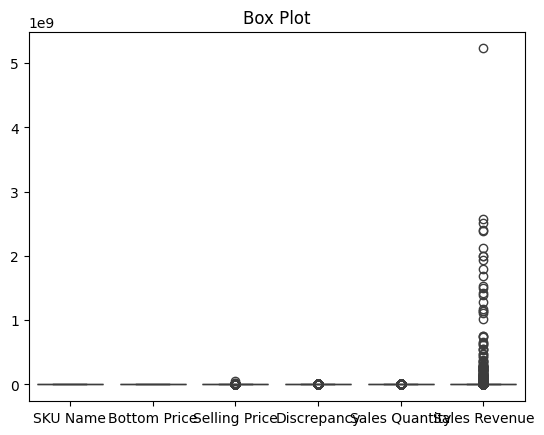

In [31]:
sns.boxplot(df)
plt.title('Box Plot')
plt.show()

*nilai ouliernya kami biarkan soalya ituu adalah variasi dari harga barang*

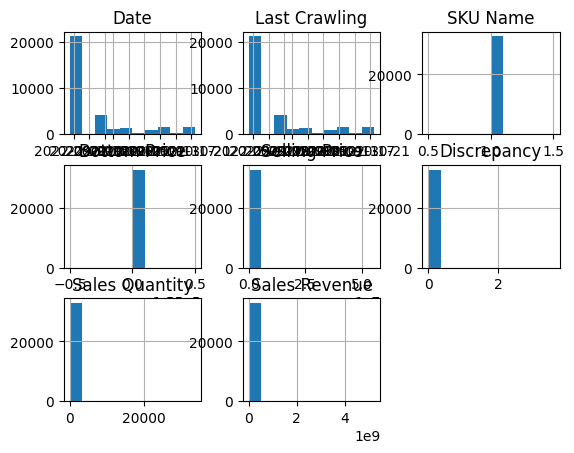

In [38]:
df.hist()
plt.show()

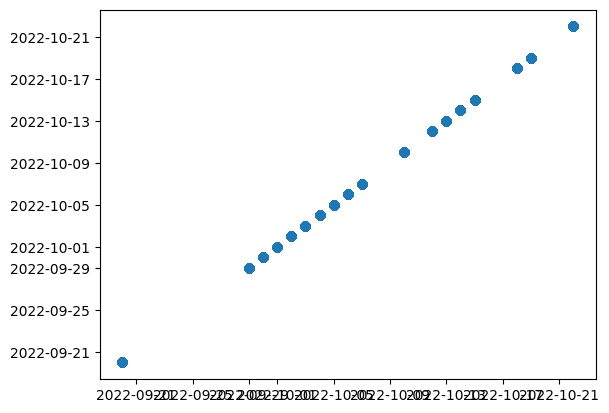

In [33]:
plt.scatter(df['Date'], df['Last Crawling'])
plt.show()

In [61]:
df['Date'] = df['Date'].astype(int)

In [ ]:
# df['Date'] = df['Date'].astype('datetime64[ns]')

In [66]:
X = df['Date']
y = df['Selling Price']

In [ ]:
def split_train(X, y, train_size=0.8, randm_state=42):
    np.shufle()

In [ ]:
slope = (X - (X.mean())).sum() * (y - (y.mean())).sum() / (X -  (X.mean()))**2

In [ ]:
interept = 

### evaluasi

In [ ]:
r = 1 - 

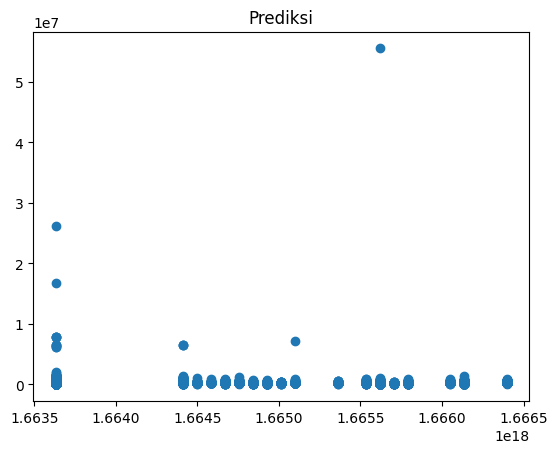

In [ ]:
plt.scatter(y_pred, y_test, alpha=0.7)
plt.plot([y_pred.min(), y_pred.max()], [y_test.min(), y_test.max()], '--r', label='Prediksi Sempurna')
plt.grid()
plt.xlabel('Gaji Prediksi')
plt.ylabel('Gaji Sebenarnya')
plt.title('Grafik Prediksi: Gaji Sebenarnya vs Prediksi')
plt.legend()
plt.show()